In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import compress_pickle

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'claw_xy_distribution_210410_combined_short'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

inferred_edges = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/inferred_edges_210409a.gz')

bottom_probabilities, top_probabilities, height_bucket_size = inferred_edges

In [21]:
def get_len(edge):
    return np.linalg.norm((edge[0], edge[1], edge[2]))

max_len = 20000
mpd = MyPlotData()
n = 0
for h, grcs in bottom_probabilities.items():
    for grc in grcs:
        for e in grc:
            if e[2] < 0:
                continue
            edge_length = get_len(e)
            if edge_length > max_len:
                continue
            n += 1
            mpd.add_data_point(x=e[0]/1000, y=e[1]/1000, z=e[2]/1000)

for h, grcs in top_probabilities.items():
    for grc in grcs:
        for e in grc:
            if e[2] > 0:
                continue
            edge_length = get_len(e)
            if edge_length > max_len:
                continue
            n += 1
            mpd.add_data_point(x=e[0]/1000, y=e[1]/1000, z=e[2]/1000)
print(n)

698


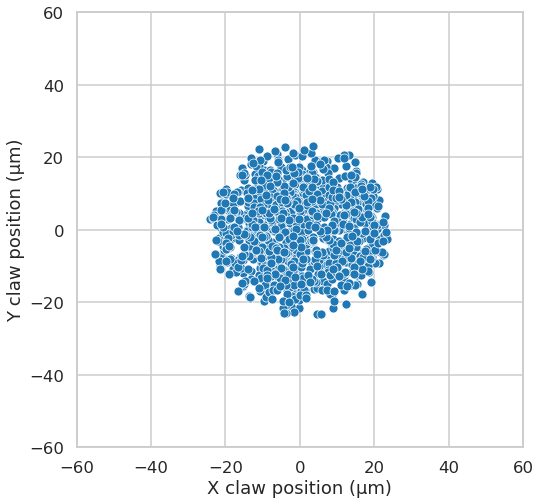

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="x",
    y="y",
    ax=ax,
    xlim=[-60, 60],
    ylim=[-60, 60],
    y_axis_label='Y claw position (µm)',
    x_axis_label='X claw position (µm)',
#     context='paper',
#     kind='scatter',
    save_filename=f'{script_n}_scatter.svg',
#     show=True,
    )

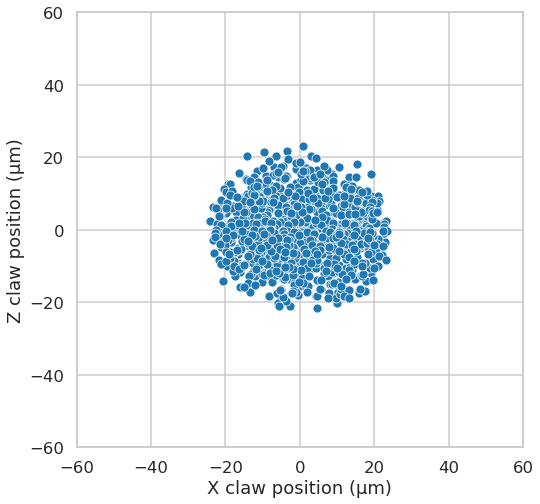

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="x",
    y="z",
    ax=ax,
    xlim=[-60, 60],
    ylim=[-60, 60],
    y_axis_label='Z claw position (µm)',
    x_axis_label='X claw position (µm)',
#     context='paper',
#     kind='scatter',
    save_filename=f'{script_n}_scatter.svg',
#     show=True,
    )

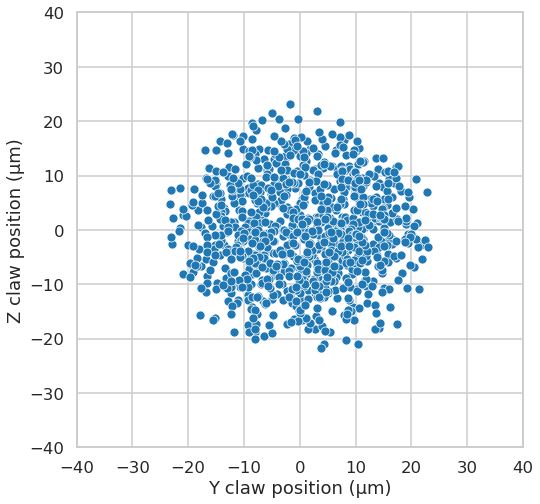

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="y",
    y="z",
    ax=ax,
    xlim=[-40, 40],
    ylim=[-40, 40],
    y_axis_label='Z claw position (µm)',
    x_axis_label='Y claw position (µm)',
#     context='paper',
#     kind='scatter',
    save_filename=f'{script_n}_scatter.svg',
#     show=True,
    )

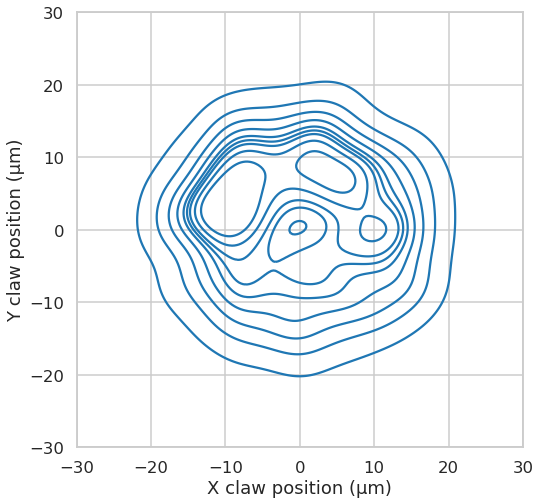

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="x",
    y="y",
    ax=ax,
    kind='kde',
    xlim=[-30, 30],
    ylim=[-30, 30],
    y_axis_label='Y claw position (µm)',
    x_axis_label='X claw position (µm)',
#     kind='scatter',
#     save_filename=f'{script_n}.svg',
#     show=True,
    )

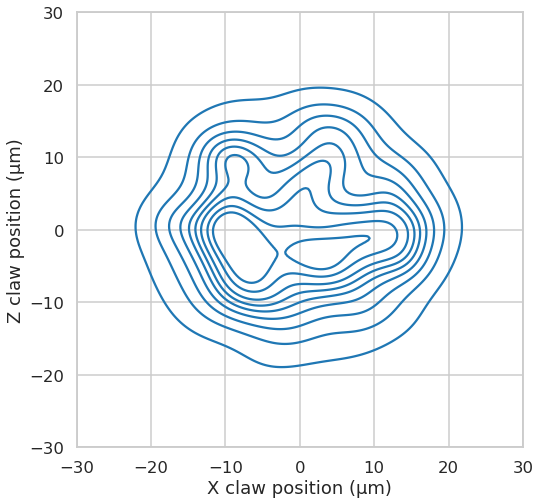

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="x",
    y="z",
    ax=ax,
    kind='kde',
    xlim=[-30, 30],
    ylim=[-30, 30],
    y_axis_label='Z claw position (µm)',
    x_axis_label='X claw position (µm)',
#     kind='scatter',
#     save_filename=f'{script_n}.svg',
#     show=True,
    )

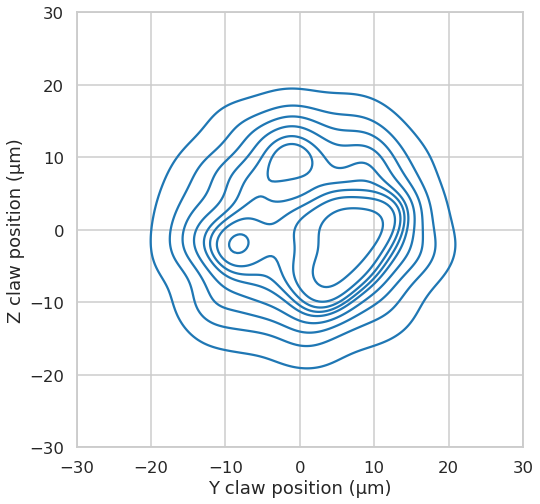

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
importlib.reload(my_plot); my_plot.my_scatterplot(
    mpd,
    x="y",
    y="z",
    ax=ax,
    kind='kde',
    xlim=[-30, 30],
    ylim=[-30, 30],
    y_axis_label='Z claw position (µm)',
    x_axis_label='Y claw position (µm)',
#     kind='scatter',
#     save_filename=f'{script_n}.svg',
#     show=True,
    )

Height: 6, Aspect: 1.33


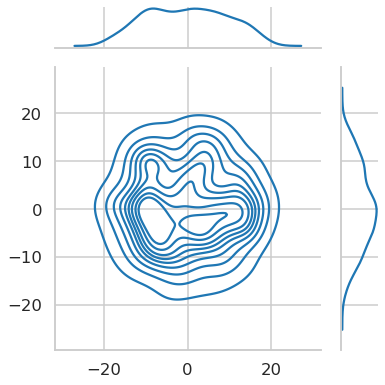

In [27]:
importlib.reload(my_plot); my_plot.my_jointplot(
    mpd,
    x="x",
    y="z",
    kind='kde',
#     save_filename=f'{script_n}.svg',
    show=True,
    )


Height: 6, Aspect: 1.33


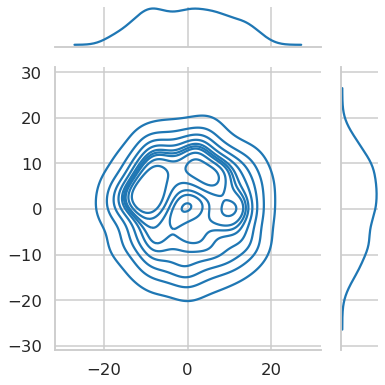

In [28]:
importlib.reload(my_plot); my_plot.my_jointplot(
    mpd,
    x="x",
    y="y",
    kind='kde',
#     save_filename=f'{script_n}.svg',
    show=True,
    )
